<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/CNN_model_for_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, MaxPool2D, Dropout, Activation
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train, X_test = X_train/ 255.0, X_test/255.0

In [4]:
a = []
b = []

for j in range(len(y_train)):
  a.append(to_categorical(y_train[j],num_classes=10))
y_train = np.array(a)

for i in range(len(y_test)):
  b.append(to_categorical(y_test[i],num_classes=10))
y_test = np.array(b)

In [41]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000,28,28,1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [25]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10,activation='softmax'))

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
history = model.fit(X_train, y_train, batch_size=256, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
235/235 [==============================] - 79s 334ms/step - loss: 0.6240 - accuracy: 0.8101 - val_loss: 0.0650 - val_accuracy: 0.9805
Epoch 2/5
235/235 [==============================] - 75s 320ms/step - loss: 0.0703 - accuracy: 0.9794 - val_loss: 0.0509 - val_accuracy: 0.9848
Epoch 3/5
235/235 [==============================] - 79s 338ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0370 - val_accuracy: 0.9884
Epoch 4/5
235/235 [==============================] - 76s 322ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 5/5
235/235 [==============================] - 72s 307ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0389 - val_accuracy: 0.9871


(0.5, 1.0)

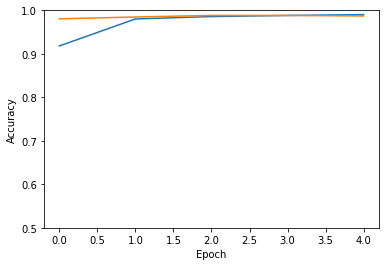

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])


In [31]:
results = model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 4s 37ms/step - loss: 0.0389 - accuracy: 0.9871


In [50]:
X_test[10].shape

(28, 28, 1)

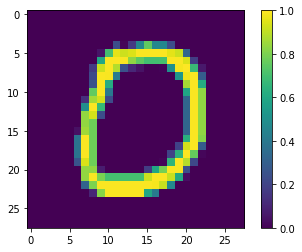

In [47]:
plt.figure()
plt.imshow(X_test[10].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()


In [48]:
prediction = model.predict(np.array([X_test[10]]))
np.argmax(prediction)

0